### CHECKING IPOs PERFORMANCE IN THE FIRST 2 YEARS

In [1]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
#stocksv variable has all the stocks
#data has the original stocks
#data1 has all the non NAN rows
#Prices1 takes into account changes since the start
#returnall all the changes

### Open the stock list

In [2]:
import pandas as pd

df = pd.read_excel('stocks.xlsx') # can also index sheet by name or fetch all sheets
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df.iloc[: , 1:]
df.columns
mylist = df[2010.0].tolist()
mylist2011 = df[2011.0].tolist()
mylist2012 = df[2012.0].tolist()
mylist2013 = df[2013.0].tolist()
mylist2014 = df[2014.0].tolist()
mylist2015 = df[2015.0].tolist()
mylist2016 = df[2016.0].tolist()
mylist2017 = df[2017.0].tolist()
mylist2018 = df[2018.0].tolist()
mylist2019 = df[2019.0].tolist()
#df1 = df.iloc[:, 0:2]
mylist = [x for x in mylist if str(x) != 'nan']
mylist2011 = [x for x in mylist2011 if str(x) != 'nan']
mylist2012 = [x for x in mylist2012 if str(x) != 'nan']
mylist2013 = [x for x in mylist2013 if str(x) != 'nan']
mylist2014 = [x for x in mylist2014 if str(x) != 'nan']
mylist2015 = [x for x in mylist2015 if str(x) != 'nan']
mylist2016 = [x for x in mylist2016 if str(x) != 'nan']
mylist2017 = [x for x in mylist2017 if str(x) != 'nan']
mylist2018 = [x for x in mylist2018 if str(x) != 'nan']
mylist2019 = [x for x in mylist2019 if str(x) != 'nan']

mylist
mylist2011
mylist2012
mystocks= mylist + mylist2011 + mylist2012 + mylist2013 + mylist2014 + mylist2015 + mylist2016 + mylist2017 +mylist2018 + mylist2019
#mystocks

### Import stocks from yfinance

In [3]:
import yfinance as yf

today = date.today()
d1 = today.strftime("%Y-%m-%d")
data = yf.download(mystocks,start="1990-01-01", end=d1)

[*********************100%***********************]  263 of 263 completed

3 Failed downloads:
- ENOH: No data found, symbol may be delisted
- ZIPCAR: No data found, symbol may be delisted
- CLDRA: No data found, symbol may be delisted


### Find the closing price for each stock 

In [4]:
adjclose = data['Adj Close']
adjclose.head(3)

,ABBV,ADPT,ADT,AGIO,AL,ALLY,ALRM,ALSN,ALTR,AMC,...,YNDX,Z,ZEN,ZIPCAR,ZM,ZNGA,ZS,ZTS,ZUO,ZZZ.TO
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert the dataframe to list. We do not want datetime index. Added the header on top of the list

In [5]:
body= adjclose.values.tolist()
headers = adjclose.columns.tolist()
body.insert(0,headers)

### Convert lists back to Dataframe. Shifted rows up.

In [6]:
df = pd.DataFrame(data= body, dtype = 'float')
df = df.apply(lambda x: pd.Series(x.dropna().values))
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

df.head(3)

,ABBV,ADPT,ADT,AGIO,AL,ALLY,ALRM,ALSN,ALTR,AMC,...,YNDX,Z,ZEN,ZIPCAR,ZM,ZNGA,ZS,ZTS,ZUO,ZZZ.TO
1,24.5281,40.3,10.7151,31.28,25.6846,23.1256,16.88,19.9186,18.31,13.5934,...,38.84,27.74,13.43,NaN,62,9.5,33,29.2002,20,13.8624
2,24.3256,48.3,9.90214,27.78,25.8225,23.1256,15.77,20.8975,17.41,14.0178,...,35,25.8,15.25,NaN,65.7,9.05,27.9,29.2096,20.6,13.8624
3,24.0183,40.1,10.3,28.53,26.6955,22.8383,15.38,21.1529,19.37,14.1544,...,34.77,25.24,16.5,NaN,69,9.24,30.38,29.2285,20.6,13.1757


https://stackoverflow.com/questions/43119503/how-to-remove-blanks-nas-from-dataframe-and-shift-the-values-up

### Check to see if the dataframe is float (nummeric) - it is not

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7206 entries, 1 to 7206
Columns: 263 entries, ABBV to ZZZ.TO
dtypes: object(263)
memory usage: 14.5+ MB


### Need all values to be float for Seaborne

In [8]:
#Need all float for Seaborne
df = df.apply(pd.to_numeric)

### Create dataframe for price evolution

In [9]:
Prices= df.head(730)
#Prices= data1['Adj Close'].head(400)
Prices.head(3)
#divide all dataframe by first line of data to enable comparison
Prices1 = Prices/Prices.iloc[0]
Prices1.tail(5).round(2)

,ABBV,ADPT,ADT,AGIO,AL,ALLY,ALRM,ALSN,ALTR,AMC,...,YNDX,Z,ZEN,ZIPCAR,ZM,ZNGA,ZS,ZTS,ZUO,ZZZ.TO
726,1.91,NaN,0.78,1.80,1.33,0.88,2.38,1.46,2.29,1.76,...,0.72,2.27,2.09,NaN,NaN,0.25,6.57,1.54,0.78,2.18
727,1.93,NaN,0.75,1.61,1.33,0.89,2.41,1.44,2.33,1.78,...,0.71,2.33,2.07,NaN,NaN,0.25,6.35,1.54,0.76,2.16
728,1.91,NaN,0.78,1.66,1.33,0.89,2.41,1.45,2.19,1.83,...,0.70,2.23,2.02,NaN,NaN,0.26,6.48,1.56,0.75,2.17
729,1.93,NaN,0.80,1.56,1.30,0.90,2.46,1.43,2.18,1.84,...,0.72,2.22,2.04,NaN,NaN,0.26,6.57,1.57,0.72,2.22
730,1.93,NaN,0.80,1.59,1.31,0.91,2.50,1.45,2.26,1.90,...,0.77,2.19,2.02,NaN,NaN,0.29,6.54,1.58,0.68,2.24


## Run the Describe Function

In [10]:
Prices1.describe()

,ABBV,ADPT,ADT,AGIO,AL,ALLY,ALRM,ALSN,ALTR,AMC,...,YNDX,Z,ZEN,ZIPCAR,ZM,ZNGA,ZS,ZTS,ZUO,ZZZ.TO
count,730.000000,549.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,0.0,597.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,1.621821,0.985258,0.654562,1.979670,0.905666,0.800975,1.718545,1.105312,1.856274,1.465777,...,0.705313,1.318312,1.740947,NaN,3.769587,0.477402,2.272815,1.222091,0.839857,1.803758
std,0.319527,0.248147,0.150576,1.033747,0.145232,0.097869,0.578433,0.222897,0.296501,0.230303,...,0.175097,0.362392,0.262807,NaN,2.314372,0.304458,1.410248,0.234578,0.273440,0.533138
min,0.959852,0.420844,0.340527,0.513427,0.637925,0.573789,0.678318,0.694907,0.950847,1.000000,...,0.428939,0.577145,1.000000,NaN,1.000000,0.221053,0.756061,0.923638,0.359500,0.873065
25%,1.349585,0.780397,0.540845,1.169437,0.792576,0.736986,1.272216,0.910042,1.646641,1.260269,...,0.566233,1.013609,1.581534,NaN,1.446613,0.307368,1.265076,1.020223,0.637625,1.217188
50%,1.618024,0.965012,0.642394,1.558664,0.890519,0.794832,1.707346,1.051020,1.900874,1.474452,...,0.653450,1.307138,1.731199,NaN,3.950161,0.356842,1.795303,1.080530,0.766500,1.963957
75%,1.887009,1.136973,0.732361,2.989050,1.008936,0.879938,2.213715,1.313658,2.082605,1.639881,...,0.838955,1.534247,1.910089,NaN,5.819838,0.481579,2.574545,1.464602,1.017250,2.221396
max,2.228280,1.680893,1.239085,4.316176,1.332236,1.074534,2.919431,1.534355,2.373020,1.956530,...,1.138517,2.363735,2.346240,NaN,9.166775,1.546316,6.586667,1.819567,1.854500,2.733107


## Determine Max value for each stock

In [11]:
Prices1.max()

0
ABBV      2.228280
ADPT      1.680893
ADT       1.239085
AGIO      4.316176
AL        1.332236
            ...   
ZNGA      1.546316
ZS        6.586667
ZTS       1.819567
ZUO       1.854500
ZZZ.TO    2.733107
Length: 263, dtype: float64

### Check Describe on Row basis

In [12]:
chart = Prices1.apply(pd.Series.describe, axis=1)
chart.tail(1).round(2)

,count,mean,std,min,25%,50%,75%,max
730,218.0,2.17,3.51,0.04,0.86,1.58,2.42,46.84


### Plot the median using Seaborn

In [19]:
chart.columns
chart= chart['50%']
sns.lineplot(data= chart)
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})

import matplotlib.pyplot as plt

plt.title('Stocks Median For The First Two Years')
plt.xlabel('Days since IPO')
plt.ylabel('Change (ratio)')

AttributeError: 'Series' object has no attribute 'columns'

### Check Median on Row basis

In [14]:
Prices1.agg("median", axis=1)

1      1.000000
2      1.000000
3      1.000949
4      1.003350
5      0.999565
         ...   
726    1.561511
727    1.579353
728    1.582401
729    1.561788
730    1.584340
Length: 730, dtype: float64

### Determine when the mean is at lowest 

In [15]:
df1= chart.to_frame(name='Median')
df1

,Median
1,1.000000
2,1.000000
3,1.000949
4,1.003350
5,0.999565
...,...
726,1.561511
727,1.579353
728,1.582401
729,1.561788


In [16]:
(df1[df1.Median == df1.Median.min()])

,Median
5,0.999565


### Beautiful and Dynamic Seaborn Plot

Text(0, 0.5, 'Change (ratio)')

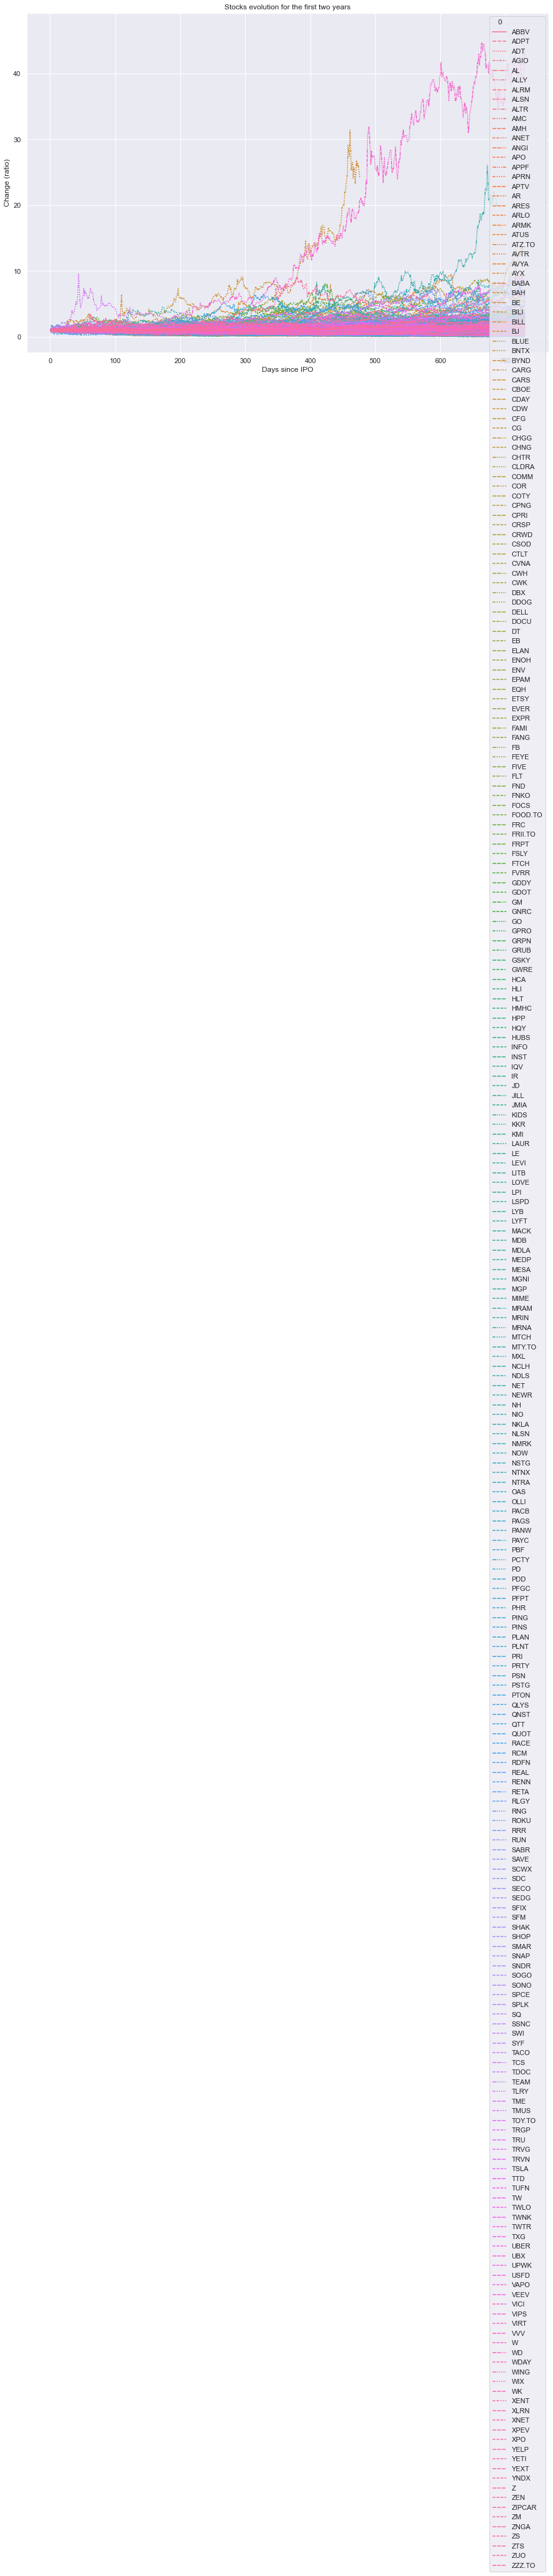

In [17]:
sns.lineplot(data= Prices1.iloc[:, :])
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})

import matplotlib.pyplot as plt

plt.title('Stocks evolution for the first two years')
plt.xlabel('Days since IPO')
plt.ylabel('Change (ratio)')


In [18]:
#sns.pairplot(Prices1)